<a href="https://colab.research.google.com/github/Its-alida/CystDetectionUsingCNNAndDIP/blob/main/DIP_image_procesing_on_ovary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cyst Detection on Ovaries

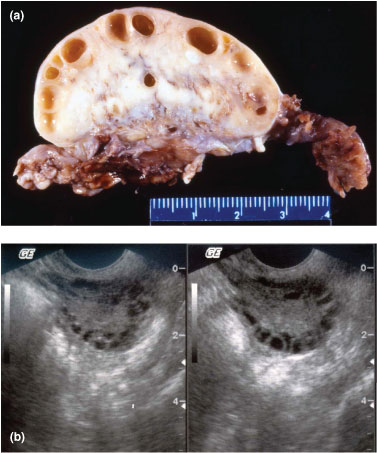

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Namings

### "not" suffix represents the not infected images

e.g : imagenot , gray_imagenot

array([[[0, 0, 0],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
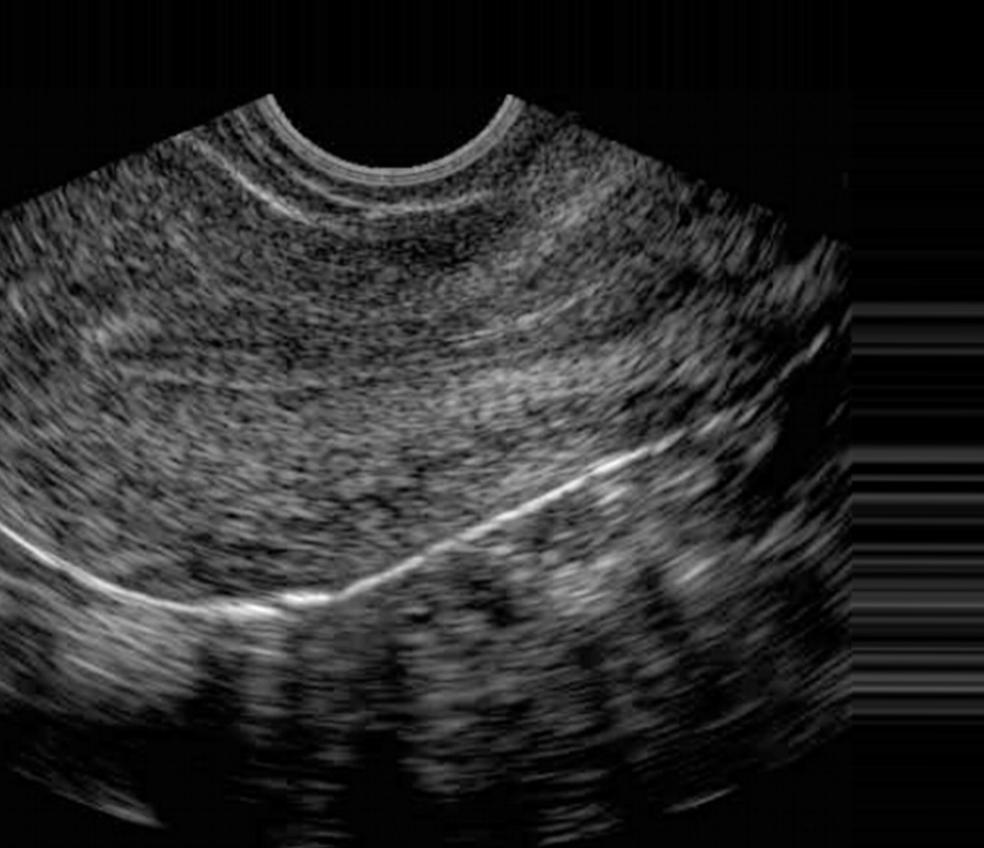

In [ ]:
imagenot = cv2.imread('notinfected.jpg')
imagenot

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 98, 127, 124],
        [197, 232, 228],
        [182, 222, 217]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 98, 127, 124],
        [197, 232, 228],
        [182, 222, 217]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 98, 127, 124],
        [197, 232, 228],
        [182, 222, 217]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]], dtype=uint8)
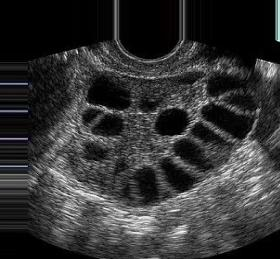

In [ ]:
image = cv2.imread('infected.jpg')
image

In [ ]:
gray_imagenot = cv2.cvtColor(imagenot, cv2.COLOR_BGR2GRAY)

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
height = min(image.shape[0], imagenot.shape[0])
width = min(image.shape[1], imagenot.shape[1])

In [ ]:
image1_resized = cv2.resize(image, (width, height)) #infected
image2_resized = cv2.resize(imagenot, (width, height)) #notinfected or normal

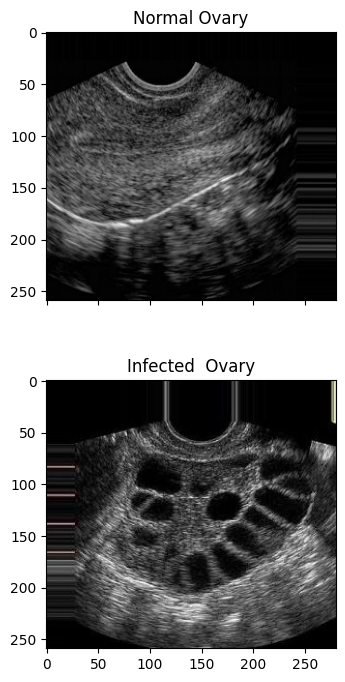

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(6, 8), sharex=True, sharey=True, gridspec_kw={'hspace': 0.3})

axes[0].imshow(cv2.cvtColor(image2_resized, cv2.COLOR_BGR2RGB))
axes[0].set_title('Normal Ovary')

axes[1].imshow(cv2.cvtColor(image1_resized, cv2.COLOR_BGR2RGB))
axes[1].set_title('Infected  Ovary')



plt.show()

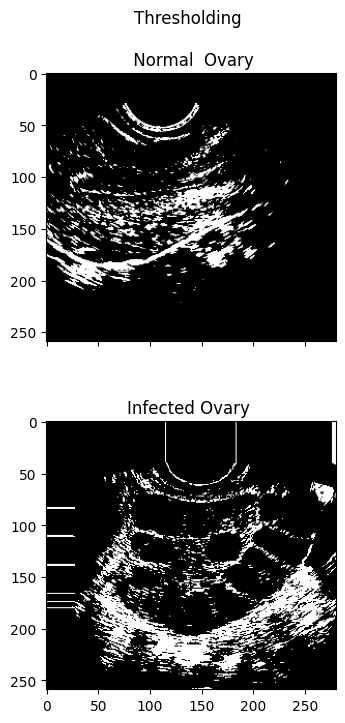

In [ ]:

_, thresholded_imagenot = cv2.threshold(gray_imagenot, 100, 255, cv2.THRESH_BINARY)

_, thresholded_image = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY)

t_of_normal = cv2.resize(thresholded_imagenot, (width, height))
t_of_infected = cv2.resize(thresholded_image, (width, height))

ig, axes = plt.subplots(2, 1, figsize=(6, 8), sharex=True, sharey=True, gridspec_kw={'hspace': 0.3})

axes[0].imshow(cv2.cvtColor(t_of_normal, cv2.COLOR_BGR2RGB))
axes[0].set_title('Thresholding \n\n Normal  Ovary')
axes[1].imshow(cv2.cvtColor(t_of_infected, cv2.COLOR_BGR2RGB))
axes[1].set_title('Infected Ovary ')

plt.show()

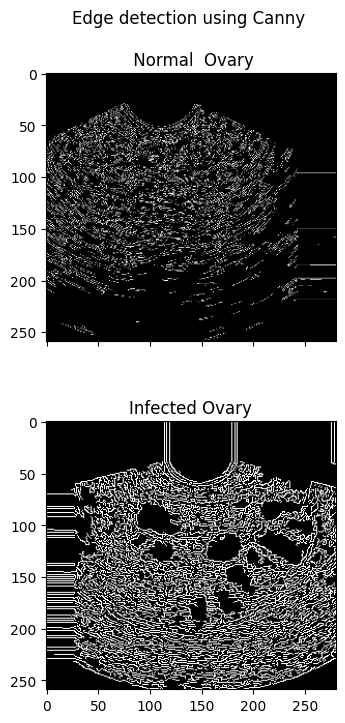

In [ ]:

edges = cv2.Canny(gray_image, 50, 150) #infected
edgesnot = cv2.Canny(gray_imagenot, 50, 150) #not infected

edge_of_infected = cv2.resize(edges, (width, height))
edge_of_normal = cv2.resize(edgesnot, (width, height))

fig, axes = plt.subplots(2, 1, figsize=(6, 8), sharex=True, sharey=True, gridspec_kw={'hspace': 0.3})
axes[0].imshow(cv2.cvtColor(edge_of_normal, cv2.COLOR_BGR2RGB))
axes[0].set_title('Edge detection using Canny \n\n Normal  Ovary')
axes[1].imshow(cv2.cvtColor(edge_of_infected, cv2.COLOR_BGR2RGB))
axes[1].set_title('Infected Ovary')

plt.show()

In [ ]:
kernel_size = (5,5)
sigma_x = 1.0
sigma_y = 1.0
kernel_x = cv2.getGaussianKernel(kernel_size[0], sigma_x)
kernel_y = cv2.getGaussianKernel(kernel_size[1], sigma_y)
gaussian_kernel = np.outer(kernel_x, kernel_y)
print("Two-dimensional Gaussian Kernel:")
print(gaussian_kernel)

Two-dimensional Gaussian Kernel:
[[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.02193823 0.09832033 0.16210282 0.09832033 0.02193823]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]




*   Erosion used to reduce the size of foreground regions, which are typically represented by white areas in binary images.
*   Following erosion, thresholding is applied to the eroded image using a low threshold value.
*   By using a low threshold value, darker areas in the image will be emphasized, leading to clearer differentiation between the cysts and the surrounding tissue.



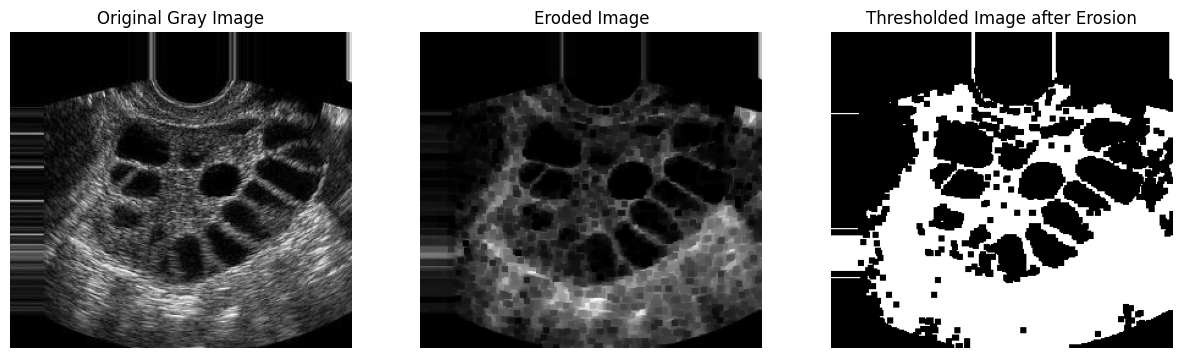

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

eroded_image = cv2.erode(gray_image, gaussian_kernel, iterations=1)
_, thresholded_image = cv2.threshold(eroded_image, 20, 255, cv2.THRESH_BINARY) #reducing the threshold to as low as 20 to get differentiation

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Gray Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Image after Erosion')
plt.axis('off')

plt.show()


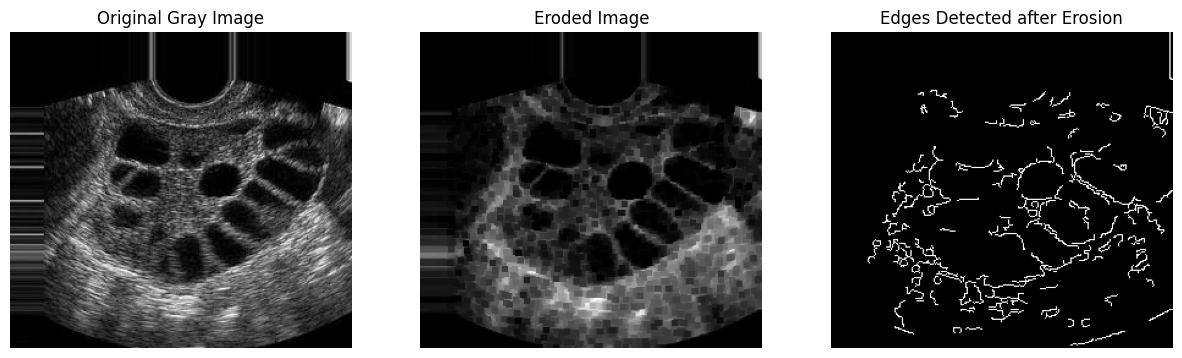

In [ ]:
edgess = cv2.Canny(eroded_image, 100, 200)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Gray Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(edgess, cmap='gray')
plt.title('Edges Detected after Erosion')
plt.axis('off')

plt.show()

In [ ]:
thresholded_image.size

72520

In [ ]:
print("Size of the image = number of elements in an image\n")
print("Size of original image (3D) :", imagenot.size)
print("Size of original image :", image2_resized.size)
print("Size of thresholded image :", t_of_normal.size)
print("Size of edge detected image :", edge_of_normal.size)


Size of the image = number of elements in an image

Size of original image (3D) : 2503296
Size of original image : 217560
Size of thresholded image : 72520
Size of edge detected image : 72520


In [ ]:
imagenot.ndim

3

In [ ]:
t_of_infected.ndim

2

## Understanding Dimensions


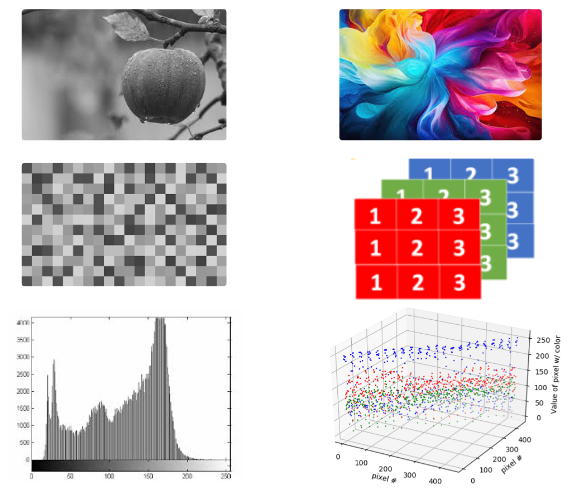

In [ ]:

arr_3d = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]], [[9, 10], [11, 12]]])

arr_2d = arr_3d.reshape(-1, arr_3d.shape[-1])

print("Original array (3D):")
print(arr_3d)
print("Converted array (2D):")
print(arr_2d)


Original array (3D):
[[[ 1  2]
  [ 3  4]]

 [[ 5  6]
  [ 7  8]]

 [[ 9 10]
  [11 12]]]
Converted array (2D):
[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]]
